In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('loandata.csv')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2564\1840820301.py:1: DtypeWarning: Columns (19,47,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('loandata.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# Data Cleaning and Handeling missing values

In [5]:
# droping null value columns
null=df.isnull().mean()
df.drop(columns=null[null.values>=0.5].index,axis=1,inplace=True)
df.shape

(421094, 54)

In [6]:
# Checking for missing Values
remain =df.isnull().mean()
remain=remain[remain.values!=0]
remain

emp_title                 0.056695
emp_length                0.056560
title                     0.000313
mths_since_last_delinq    0.484360
revol_util                0.000385
last_pymnt_d              0.041043
next_pymnt_d              0.061167
last_credit_pull_d        0.000026
dtype: float64

In [7]:
len(df['emp_title'].unique())

120812

In [8]:
# two many categoery therfore droping
df.drop('emp_title',axis=1,inplace=True)

In [9]:
# same as purpose
df.drop('title',axis=1,inplace=True)

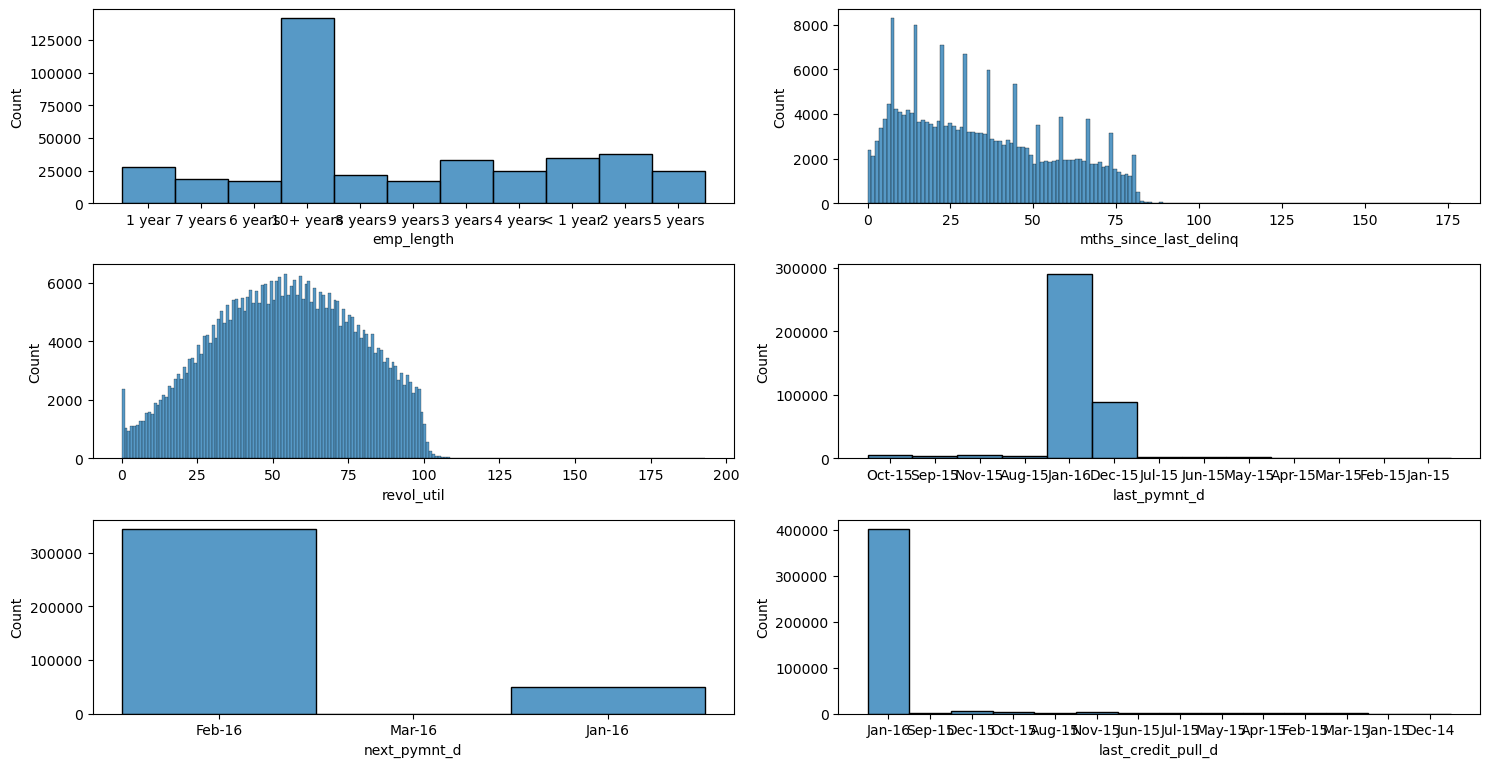

In [10]:
num_cols = ['emp_length','mths_since_last_delinq','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
plt.figure(figsize=(15, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 2, i + 1)
    sns.histplot(data=df, x=num_cols[i])

plt.tight_layout()

In [11]:
df['emp_length']=df['emp_length'].fillna(value=df['emp_length'].mode()[0])
df['mths_since_last_delinq']=df['mths_since_last_delinq'].fillna(value=df['mths_since_last_delinq'].median())
df['revol_util']=df['revol_util'].fillna(value=df['revol_util'].median())
df['last_pymnt_d']=df['last_pymnt_d'].fillna(value=df['last_pymnt_d'].mode()[0])
df['next_pymnt_d']=df['next_pymnt_d'].fillna(value=df['next_pymnt_d'].mode()[0])
df['last_credit_pull_d']=df['last_credit_pull_d'].fillna(value=df['last_credit_pull_d'].mode()[0])

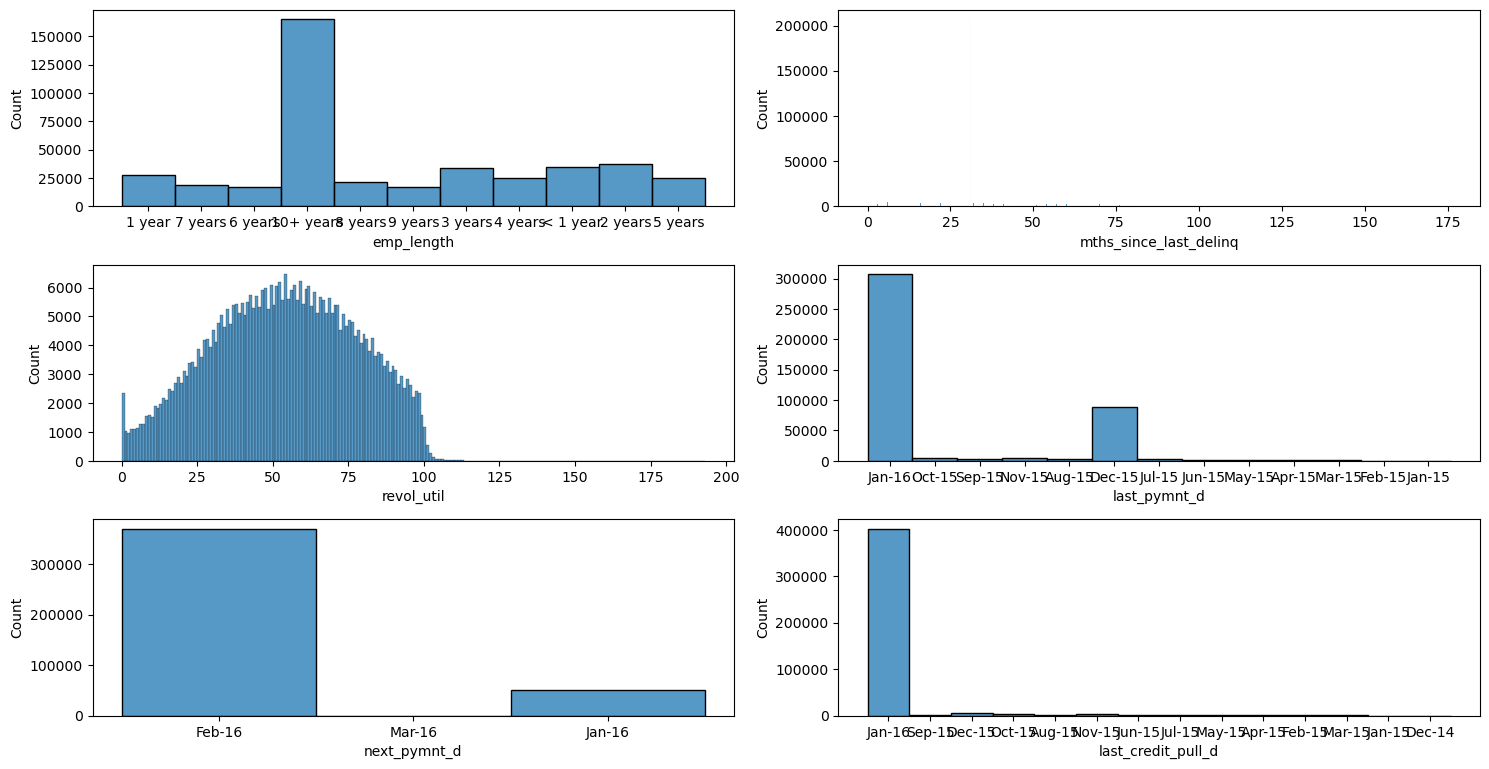

In [12]:
num_cols = ['emp_length','mths_since_last_delinq','revol_util','last_pymnt_d','next_pymnt_d','last_credit_pull_d']
plt.figure(figsize=(15, 15))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 2, i + 1)
    sns.histplot(data=df, x=num_cols[i])

plt.tight_layout()

# Creating Target variable

In [14]:
df['loan_status'].value_counts()

loan_status
Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: count, dtype: int64

In [15]:
df['loan_status']=df['loan_status'].replace({'Current': 1,'In Grace Period': 1, 'Issued': 1, 'Late (16-30 days)': 1, 'Fully Paid': 1,'Default': 0 , 'Late (31-120 days)': 0, 'Charged Off': 0})

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2564\3845685886.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['loan_status']=df['loan_status'].replace({'Current': 1,'In Grace Period': 1, 'Issued': 1, 'Late (16-30 days)': 1, 'Fully Paid': 1,'Default': 0 , 'Late (31-120 days)': 0, 'Charged Off': 0})


In [16]:
df['loan_status'].value_counts()

loan_status
1    413243
0      7851
Name: count, dtype: int64

In [17]:
(7851/413243)*100

1.899850693175686

# Dealing with date

In [19]:
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [20]:
def calculate_month_diff(df, column):
    today_date = pd.to_datetime('2023-04-01')
    df[column] = pd.to_datetime(df[column], format="%b-%y")

    # Calculate the difference in years and months
    diff_in_years = today_date.year - df[column].dt.year
    diff_in_months = today_date.month - df[column].dt.month

    # Combine years and months to get the total difference in months
    df[column+'_months'] = diff_in_years * 12 + diff_in_months
    df.drop(column,axis=1,inplace=True)

In [21]:
calculate_month_diff(df, 'issue_d')
calculate_month_diff(df, 'earliest_cr_line')
calculate_month_diff(df, 'last_pymnt_d')
calculate_month_diff(df, 'next_pymnt_d')
calculate_month_diff(df, 'last_credit_pull_d')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 52 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          421094 non-null  int64  
 1   member_id                   421094 non-null  int64  
 2   loan_amnt                   421094 non-null  int64  
 3   funded_amnt                 421094 non-null  int64  
 4   funded_amnt_inv             421094 non-null  int64  
 5   term                        421094 non-null  object 
 6   int_rate                    421094 non-null  float64
 7   installment                 421094 non-null  float64
 8   grade                       421094 non-null  object 
 9   sub_grade                   421094 non-null  object 
 10  emp_length                  421094 non-null  object 
 11  home_ownership              421094 non-null  object 
 12  annual_inc                  421094 non-null  float64
 13  verification_s

# Feature Selection

In [24]:
df.drop(columns = ['id', 'member_id', 'url','zip_code','addr_state','sub_grade'], inplace = True)

In [25]:
Y =df['loan_status']
object =df.select_dtypes(include = 'object')
num =df.select_dtypes(include = 'number').drop('loan_status',axis=1)

In [26]:
# Selecting catagoerical Feature

In [27]:
object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   term                 421094 non-null  object
 1   grade                421094 non-null  object
 2   emp_length           421094 non-null  object
 3   home_ownership       421094 non-null  object
 4   verification_status  421094 non-null  object
 5   pymnt_plan           421094 non-null  object
 6   purpose              421094 non-null  object
 7   initial_list_status  421094 non-null  object
 8   application_type     421094 non-null  object
dtypes: object(9)
memory usage: 28.9+ MB


In [28]:
from scipy.stats import chi2_contingency

def chi_square_significant_columns(df, columns_list, y, alpha=0.05):
    significant_columns = []
    for col in columns_list:
        # Create a contingency table with the feature and the target column
        contingency_table = pd.crosstab(df[col], y)
        # Perform the Chi-Square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        # Check if p-value is less than the threshold alpha
        if p < alpha:
            significant_columns.append(col)

    return significant_columns


In [29]:
obj_columns=chi_square_significant_columns(object,object.columns, Y)

In [30]:
#selecting Numerical feature

In [31]:
num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 36 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   421094 non-null  int64  
 1   funded_amnt                 421094 non-null  int64  
 2   funded_amnt_inv             421094 non-null  int64  
 3   int_rate                    421094 non-null  float64
 4   installment                 421094 non-null  float64
 5   annual_inc                  421094 non-null  float64
 6   dti                         421094 non-null  float64
 7   delinq_2yrs                 421094 non-null  int64  
 8   inq_last_6mths              421094 non-null  int64  
 9   mths_since_last_delinq      421094 non-null  float64
 10  open_acc                    421094 non-null  int64  
 11  pub_rec                     421094 non-null  int64  
 12  revol_bal                   421094 non-null  int64  
 13  revol_util    

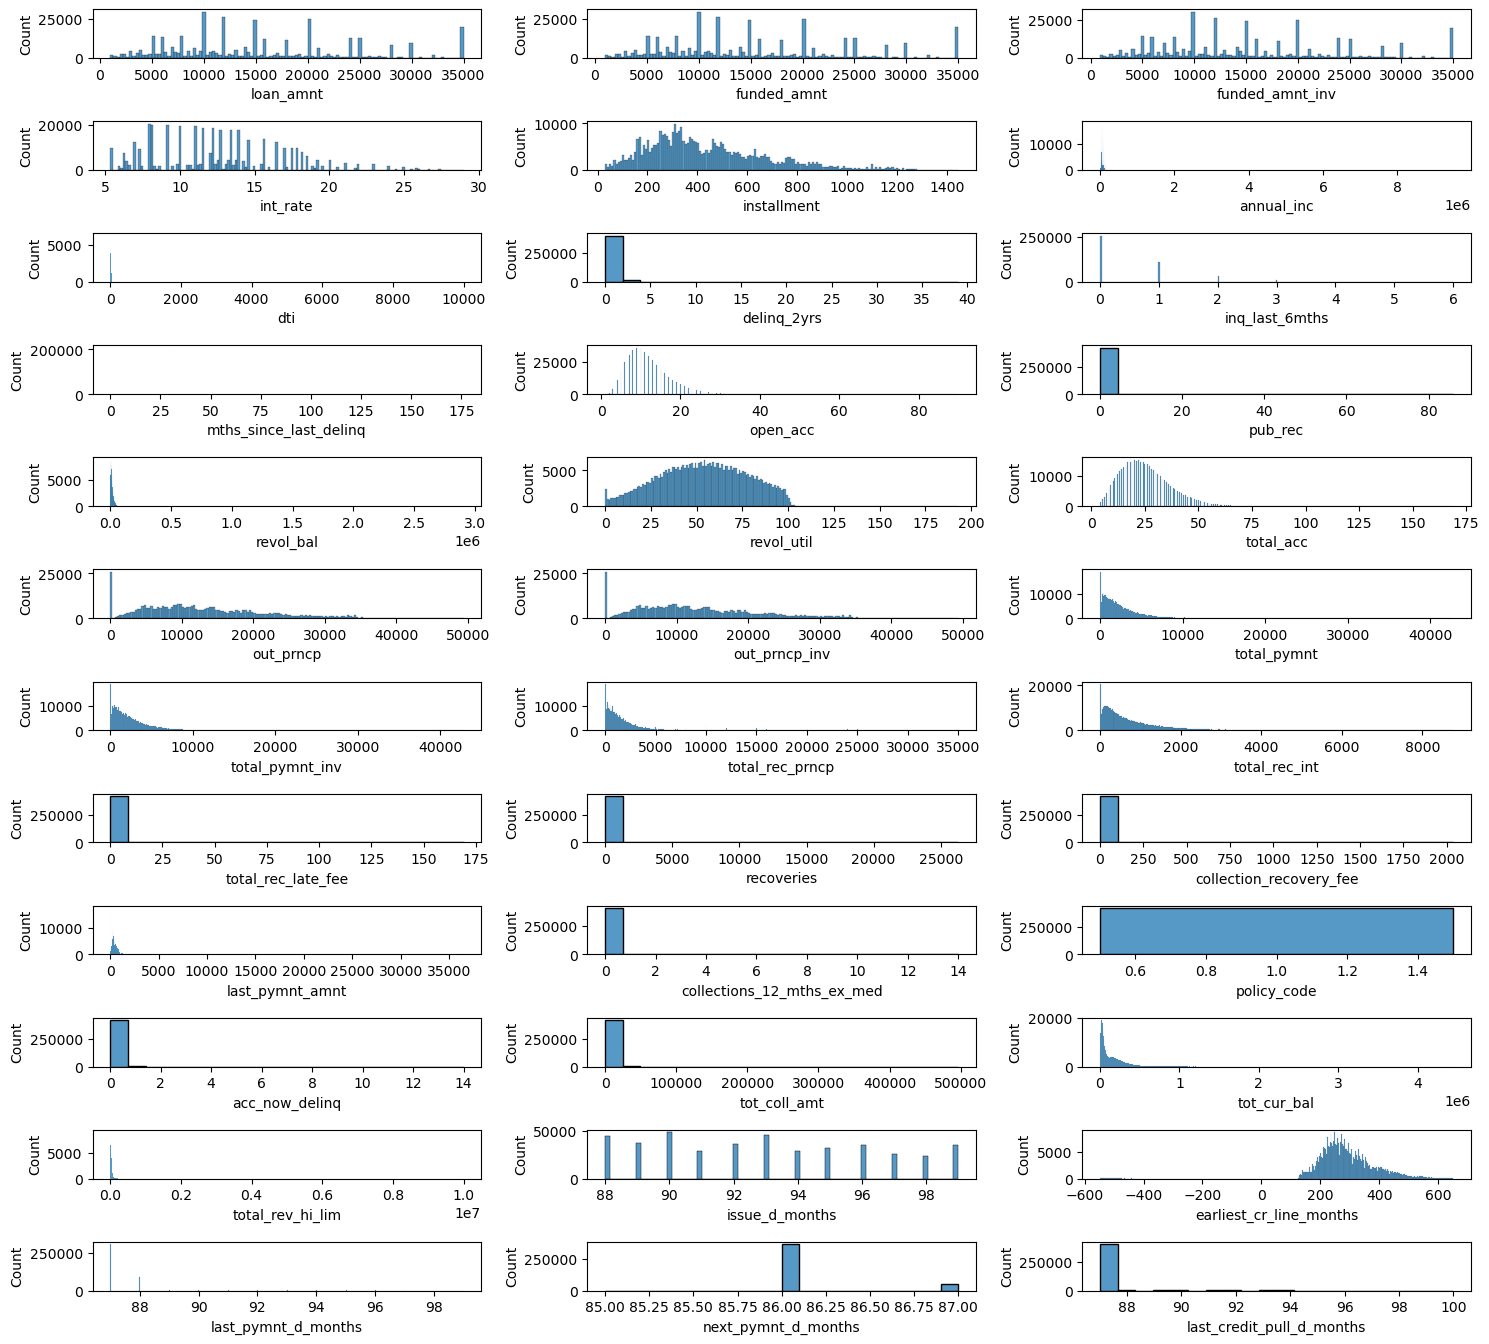

In [32]:
num_cols = num.columns
plt.figure(figsize=(15, 40))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols), 3, i + 1)
    sns.histplot(data=num, x=num_cols[i])

plt.tight_layout()

In [33]:
# droping , 'funded_amnt', 'funded_amnt_inv'=='loan_amnt'
# 'funded_amnt', 'funded_amnt_inv',delinq_2yrs, inq_last_6mths, pub_rec, out_prncp, out_prncp_inv, total_rec_late_fee, recoveries, collection_recovery_fee, policy_code, collections_12_mths_ex_med, acc_now_delinq, and tot_coll_amt==0

In [34]:
num.drop([
    'funded_amnt', 'funded_amnt_inv', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec', 
    'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'recoveries', 
    'collection_recovery_fee', 'policy_code', 'collections_12_mths_ex_med', 
    'acc_now_delinq', 'tot_coll_amt'
],axis=1,inplace=True)

In [35]:
# Some outliers from the columns open_acc, revol_balance, total_acc, total_rec_int, tot_cur_balance, and total_rev_hi_lim could be removed.

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def drop_high_vif_columns(df, threshold=5.0):
    while True:
        vif_data = pd.DataFrame()
        vif_data["Feature"] = df.columns
        vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
        
        # Find the feature with the maximum VIF
        max_vif = vif_data["VIF"].max()
        
        if max_vif >= threshold:
            max_vif_feature = vif_data.loc[vif_data["VIF"].idxmax(), "Feature"]
            df.drop(columns=[max_vif_feature], inplace=True)
        else:
            break  # Stop if no VIF is above the threshold

    return df

In [37]:
num= drop_high_vif_columns(num, threshold=5.0)

In [38]:
from scipy.stats import ttest_ind

def t_test_significant_columns(df, columns_list, y, alpha=0.05):
    significant_columns = []
    values={}
    for col in columns_list:
        # Separate the feature values based on the target variable
        group_0 = df[y == 0][col]
        group_1 = df[y == 1][col]

        # Perform the t-test
        t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)  # Assuming unequal variance
        values[col]=p_value.round(5)

        # Check if p-value is less than the threshold alpha
        if p_value < alpha:
            significant_columns.append(col)

    return significant_columns,values


In [39]:
num_columns,values =t_test_significant_columns(num,num.columns,Y)

In [40]:
final=df[obj_columns+num_columns]

In [41]:
final.columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type', 'annual_inc',
       'dti', 'mths_since_last_delinq', 'open_acc', 'revol_bal', 'revol_util',
       'total_rec_int', 'last_pymnt_amnt', 'tot_cur_bal'],
      dtype='object')

In [42]:
final.shape

(421094, 17)

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# Define the columns
ordinal_cols = ['term', 'grade', 'emp_length', 'initial_list_status']
nominal_cols = ['home_ownership', 'verification_status', 'purpose', 'application_type']
numerical_cols = num_columns
'''['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 
                  'open_acc', 'revol_bal', 'revol_util', 'out_prncp_inv', 'total_rec_int', 
                  'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 
                  'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_cur_bal']'''

# Ordinal Encoding categories in order of their levels
ordinal_categories = [
    [' 36 months', ' 60 months'],  # term
    ['A', 'B', 'C', 'D', 'E', 'F', 'G'],  # grade
    ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],  # emp_length
    ['f', 'w']  # initial_list_status
]

# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(categories=ordinal_categories), ordinal_cols),
        ('nom', OneHotEncoder(drop ='first'), nominal_cols)
    ]
   , remainder='passthrough' 
)



In [44]:
finalt = preprocessor.fit_transform(final)

In [45]:
finalt = pd.DataFrame(finalt, columns=numerical_cols + ordinal_cols + list(preprocessor.named_transformers_['nom'].get_feature_names_out(nominal_cols)))

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
finals, ys = smote.fit_resample(finalt, Y)

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(finals, ys, test_size=0.2, random_state=42, stratify=ys)

# Model Selection

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [51]:
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [52]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [53]:
rf=RandomForestClassifier(n_estimators=40)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40)

In [54]:
xg=XGBClassifier()
xg.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_pre=lr.predict_proba(x_test)

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

def plot_roc_curves(x_test, y_test, models, model_names):
    plt.figure(figsize=(10, 8))
    for model, name in zip(models, model_names):
        # Predict probabilities
        y_prob = model.predict_proba(x_test)[:, 1]  # Probability for the positive class
        # Compute ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



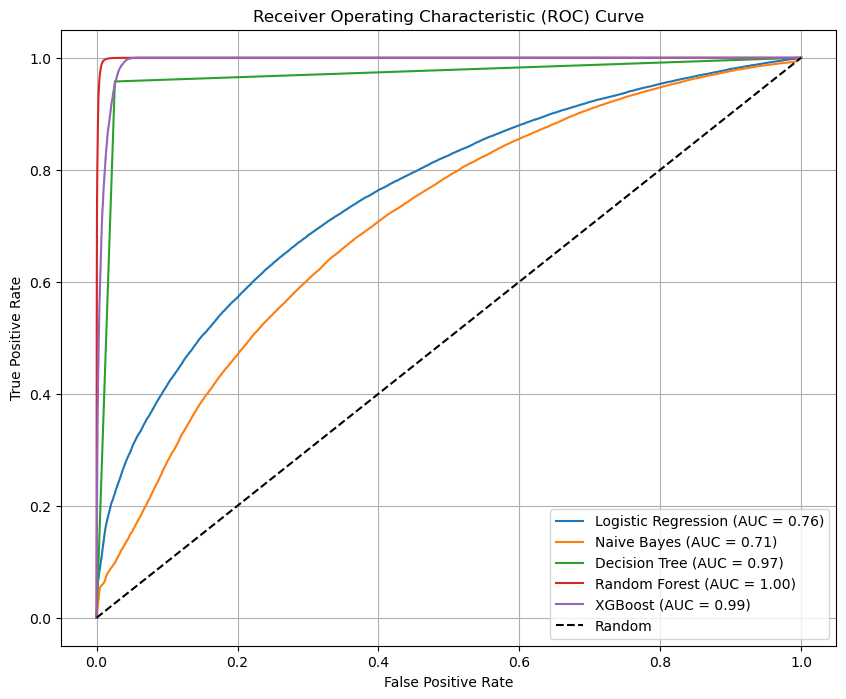

In [57]:
models = [lr, nb, dt, rf, xg]
model_names = ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost']
plot_roc_curves(x_test, y_test, models, model_names)

# Model Building

In [59]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split

# Sample data (replace this with your dataset)
# X, y: your feature matrix and target labels
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter space for RandomizedSearchCV
param_dist = {
    'n_estimators': [10, 20, 30, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 1, 10],
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=50, scoring='roc_auc', 
                                   cv=5, verbose=1, n_jobs=-1, random_state=42)


In [60]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [10, 20, 30, 40, 50],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [0.1, 1, 10],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [61]:
best_xgb = random_search.best_estimator_
print(f"Best Hyperparameters: {random_search.best_params_}")

Best Hyperparameters: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 50, 'min_child_weight': 4, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0, 'colsample_bytree': 0.8}


In [62]:
y_pred = best_xgb.predict(x_test)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     82649
           1       0.95      1.00      0.97     82649

    accuracy                           0.97    165298
   macro avg       0.97      0.97      0.97    165298
weighted avg       0.97      0.97      0.97    165298

